In [1]:
#general libs
import os
import time

#computing libs
import numpy as np
import pandas as pd

#ml model libs
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer


# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
file_path = "../data/raw/data.txt"

data = pd.read_csv(file_path,
                  sep=",")


## Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    58 non-null     object
 1   Movie   58 non-null     object
 2   Rating  55 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [4]:
#Users
data['User'].unique()

array(['Alice', 'Frank', 'Bob', 'Carol', 'Dave', 'Emily', 'Quincy',
       'Paul', 'Ivy', 'Karen', 'Leo', 'Mia', 'Nina', 'Oscar', 'Sarah',
       'Tom', 'Victor', 'Wendy', 'Zane', 'Uma', 'Xander', 'Yara'],
      dtype=object)

In [5]:
data['User'] = data['User'].str.upper()

In [6]:
#Movies
data['Movie'].unique()

array(['Star Wars', 'The Godfather', 'Titanic', 'The Matrix', 'Inception',
       'Pulp Fiction', 'Forrest Gump', 'Matrix'], dtype=object)

In [7]:
data[data['Movie'] == 'Matrix']

,User,Movie,Rating
45,VICTOR,Matrix,x


'The matrix' and 'matrix' seem to be the same movie and there only seems to be one entry of 'matrix'

In [8]:
data['Movie'].replace('Matrix', 'The Matrix', inplace = True)

In [9]:
#Ratings
x = pd.to_numeric(data['Rating'], errors='coerce')
nan_idx = x[x.isna()].index

In [10]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

In [11]:
# Data cleaning
data = data.drop_duplicates()
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
#data = data.dropna(subset=['User', 'Movie', 'Rating'])

In [12]:
# Handle irregular or incomplete data
imputer = SimpleImputer(strategy='median')
data['Rating'] = imputer.fit_transform(data['Rating'].values.reshape(-1, 1))

In [13]:
# check for nan
data.isna().any()

User      False
Movie     False
Rating    False
dtype: bool

In [14]:
# save data for use in algorithm
path = '../data/internal/data.csv'
data.to_csv(path)

## Data Analysis

In [23]:
# list of movies
movies = data['Movie'].unique()
list(movies)

['Star Wars',
 'The Godfather',
 'Titanic',
 'The Matrix',
 'Inception',
 'Pulp Fiction',
 'Forrest Gump']

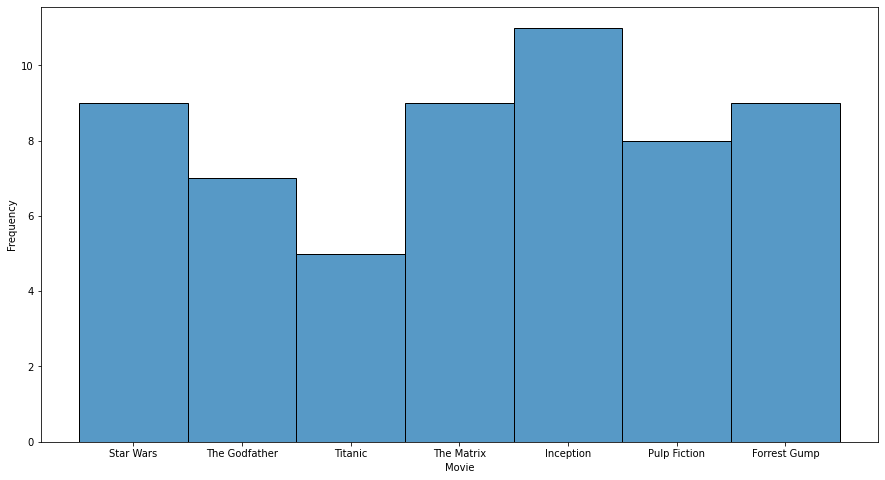

In [15]:
# Movies and there frequency
plt.figure(figsize=(15,8))
sns.histplot(data['Movie'],
            stat="frequency",);

In [16]:
# Calculate average rating for each movie
median_ratings = data.groupby('Movie')['Rating'].median().reset_index()
average_ratings = data.groupby('Movie')['Rating'].mean().reset_index()

average rating for each movie

In [18]:
average_ratings

,Movie,Rating
0,Forrest Gump,3.944444
1,Inception,3.272727
2,Pulp Fiction,3.687500
3,Star Wars,4.333333
4,The Godfather,4.428571
5,The Matrix,3.722222
6,Titanic,4.400000


## Algorithm

In [19]:
# Collaborative Filtering Algorithm
user_movie_matrix = data.pivot_table(index='User', columns='Movie', values='Rating', fill_value=0)
user_movie_matrix

Movie,Forrest Gump,Inception,Pulp Fiction,Star Wars,The Godfather,The Matrix,Titanic
User,,,,,,,
ALICE,0.0,3,0.0,5,0,4.0,0
BOB,0.0,0,0.0,2,4,0.0,5
CAROL,0.0,5,4.0,0,0,3.0,0
DAVE,5.0,2,0.0,0,0,0.0,4
EMILY,3.0,0,4.0,0,5,0.0,0
FRANK,3.0,0,0.0,5,4,0.0,0
IVY,0.0,3,0.0,5,0,4.0,0
KAREN,0.0,5,4.0,0,0,3.0,0
LEO,5.0,2,0.0,0,0,0.0,4


In [24]:
cosine_sim = cosine_similarity(user_movie_matrix.T)
data_cos = pd.DataFrame(cosine_sim, columns=movies, index=movies)
data_cos

,Star Wars,The Godfather,Titanic,The Matrix,Inception,Pulp Fiction,Forrest Gump
Star Wars,1.000000,0.141899,0.358526,0.271624,0.376174,0.146190,0.331856
The Godfather,0.141899,1.000000,0.456607,0.396087,0.036636,0.630443,0.174528
Titanic,0.358526,0.456607,1.000000,0.099323,0.320228,0.386411,0.000000
The Matrix,0.271624,0.396087,0.099323,1.000000,0.306018,0.401374,0.227783
Inception,0.376174,0.036636,0.320228,0.306018,1.000000,0.120781,0.342720
Pulp Fiction,0.146190,0.630443,0.386411,0.401374,0.120781,1.000000,0.000000
Forrest Gump,0.331856,0.174528,0.000000,0.227783,0.342720,0.000000,1.000000


## User Interface

In [25]:
def get_top_indices(df, n):
    # Flatten the DataFrame and sort the values
    flatten_values = df.values.flatten() 
    sorted_values = sorted(flatten_values, reverse=True)

    # Get the unique indices of the n largest values
    unique_indices = df[df.isin(sorted_values[:n] ).values].dropna().index.unique()
    return unique_indices

def recommend_movies(user):
    movie_ratings = user_movie_matrix.loc[user]
    watched_list = movie_ratings[movie_ratings > 0]
    
    mod_data_cos = data_cos.drop(watched_list.index, axis = 1)
    
    recc_list = []
    for index, value in watched_list.items():
        weight = value/watched_list.sum()

        recc_list.append(mod_data_cos.loc[index]*(1+weight))
        
        final_df = pd.concat(recc_list, axis=1)
        
    return get_top_indices(final_df, 3)

def main():
    user_name = input("Please enter your name: ").upper()

    # Check if the user exists in the data
    if user_name not in user_movie_matrix.index:
        print("User not found !!!")
        time.sleep(0.1)
        print("Recommending popular movies.")
        time.sleep(1)
        popular_movies = average_ratings.sort_values(by='Rating', ascending=False)['Movie']
        recommendations = list(popular_movies.head(3))
        print(f"{recommendations}")
        
    else :
        recommendations = list(recommend_movies(user_name))
        print(f"Recommended movies for {user_name}")
        print(f"{recommendations}")
        

main()

Please enter your name: ALICE
0.25
               Inception
The Godfather   0.045795
Titanic         0.400285
Pulp Fiction    0.150976
Forrest Gump    0.428400
0.4166666666666667
               Inception  Star Wars
The Godfather   0.045795   0.201024
Titanic         0.400285   0.507912
Pulp Fiction    0.150976   0.207102
Forrest Gump    0.428400   0.470129
0.3333333333333333
               Inception  Star Wars  The Matrix
The Godfather   0.045795   0.201024    0.528116
Titanic         0.400285   0.507912    0.132430
Pulp Fiction    0.150976   0.207102    0.535165
Forrest Gump    0.428400   0.470129    0.303711
[0.535164947944167, 0.5281162602549665, 0.5079124828886372, 0.4701292557316045, 0.4284001027886194, 0.4002851045277945, 0.30371085911584794, 0.2071021591087271, 0.2010240048193071, 0.15097564794065937, 0.13243017845116184, 0.04579522720488596]
Recommended movies for ALICE
['The Godfather', 'Titanic', 'Pulp Fiction']
